In [38]:
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt
from coclusterSVD import score, cocluster


def generate(seed, num_bicluster, num_pool, M, N) -> np.ndarray:
    # psedo random vector with fixed seed, ori(0), ori(1), ... ori(num_bicluster-1)
    ori = np.random.RandomState(seed=seed).rand(num_bicluster, num_pool)

    # random n(0) n(1) n(2) ... n(num_bicluster-1) as the length of each bicluster base vector
    n = np.random.RandomState(seed=seed).randint(
        num_pool/5, num_pool, num_bicluster)
    # m is the height of biclusters
    m = np.random.RandomState(
        seed=seed+1).randint(num_pool/5, num_pool, num_bicluster)
    # scale = np.random.RandomState(seed+2).rand(num_bicluster)

    # p is a list, p[i] is a n[i]-length vector, as the base of bicluster i
    p = []
    for i in range(num_bicluster):
        p.append(ori[i][:n[i]])

    for i in range(num_bicluster):
        assert len(p[i]) == n[i]

    A = np.zeros((M, N))

    # A(0:n(0), 0:m(0)) = p(0)
    # A(n(0):n(0)+n(1), 0:m(1)) = p(1)
    # ...

    startx = starty = 0

    for i in range(num_bicluster):
        for j in range(m[i]):
            A[startx:startx+n[i], starty+j] = p[i]
        startx += n[i]
        starty += m[i]

    # show A as a heatmap
    # plt.imshow(A, cmap='hot', interpolation='nearest')
    # plt.show()

    # permutation of M and N
    permx = np.random.RandomState(seed).permutation(M)
    permy = np.random.RandomState(seed+1).permutation(N)

    # permute A
    A = A[permx, :]
    A = A[:, permy]

    # B = A + rand * 0.1 * average(A)
    B = A + np.random.RandomState(seed).rand(M, N) * 0.1 * np.mean(A)

    # show B as a heatmap

    return B


ImportError: cannot import name 'cocluster' from 'coclusterSVD' (/Users/zihanwu/Public/codes/big_matrix_cocluster/coclusterSVD.cpython-311-darwin.so)

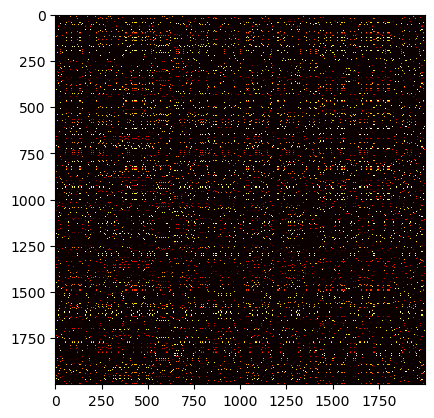

In [39]:
seed = 42
num_pool = 200 # as random pool for bases of biclusters
# num_upper_bound = 20 # upper bound of number of biclusters
# num_bicluster = np.random.RandomState(seed+1).randint(1, num_upper_bound, 1)[0] # number of biclusters
num_bicluster = 15

M = 2000
N = 2000
B = generate(seed=seed, num_pool=num_pool, num_bicluster=num_bicluster, M=M, N=N)
plt.imshow(B, cmap='hot', interpolation='nearest')
plt.show()

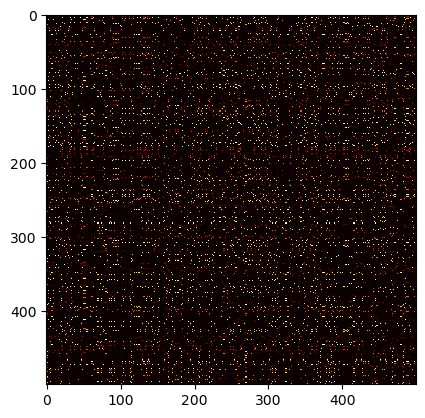

In [40]:
partition : int = 4

sizex = M // partition
sizey = N // partition

testB = B[:sizex, :sizey]

plt.imshow(testB, cmap='hot', interpolation='nearest')


In [41]:
cocluster(testB, scale=sizex, k = 10)

NameError: name 'cocluster' is not defined